# Data preparation
##### 1. Load the data from EDA
##### 2. Normalize
##### 3. Set up a Data pipeline, do shuffle, split the data into training, testing, split up into batches

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import StandardScaler

In [3]:
#load data
df = pd.read_csv('/content/sample_data/CreditCard_EDA.csv')
df.head()

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,MARRIAGE_0,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
0,6.502290,24,2,2,-1,-1,-2,-2,4.870862,4.638605,...,0,1,0,0,0,0,0,1,0,0
1,8.294050,26,-1,2,0,0,0,2,4.493121,4.051785,...,0,1,0,0,0,0,0,0,1,0
2,8.006368,34,0,0,0,0,0,0,6.882061,6.147542,...,0,1,0,0,0,0,0,0,1,0
3,7.418581,37,0,0,0,0,0,0,7.356493,7.382601,...,0,1,0,0,0,0,0,1,0,0
4,7.418581,57,-1,0,-1,0,0,0,5.660295,5.241747,...,0,1,0,0,0,0,0,1,0,0


In [ ]:
df.columns

Index(['LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default.payment.next.month',
       'SEX_1', 'SEX_2', 'EDUCATION_0', 'EDUCATION_1', 'EDUCATION_2',
       'EDUCATION_3', 'EDUCATION_4', 'EDUCATION_5', 'EDUCATION_6',
       'MARRIAGE_0', 'MARRIAGE_1', 'MARRIAGE_2', 'MARRIAGE_3'],
      dtype='object')

In [ ]:
df[['default.payment.next.month']].values.shape
df[['LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'SEX_1', 'SEX_2', 'EDUCATION_0', 'EDUCATION_1', 'EDUCATION_2',
       'EDUCATION_3', 'EDUCATION_4', 'EDUCATION_5', 'EDUCATION_6',
       'MARRIAGE_0', 'MARRIAGE_1', 'MARRIAGE_2', 'MARRIAGE_3']].values.shape

(30000, 33)

In [4]:
#Normalization, Pouring data into pipeline, shuffle, split the training, evaluating, and testing data, split the dataset into batches

X = df[['LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'SEX_1', 'SEX_2', 'EDUCATION_0', 'EDUCATION_1', 'EDUCATION_2',
       'EDUCATION_3', 'EDUCATION_4', 'EDUCATION_5', 'EDUCATION_6',
       'MARRIAGE_0', 'MARRIAGE_1', 'MARRIAGE_2', 'MARRIAGE_3']].values
y = np.squeeze(df[['default.payment.next.month']].values)
print(X.shape, y.shape)

# Normalize the input features using Z-score normalization
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

print(X[0])
print(X_normalized[0])
print(y[0:5])


(30000, 33) (30000,)
[ 6.50229017 24.          2.          2.         -1.         -1.
 -2.         -2.          4.87086224  4.63860496  3.13404389  0.
  0.          0.          0.          3.13404389  0.          0.
  0.          0.          0.          1.          0.          0.
  1.          0.          0.          0.          0.          0.
  1.          0.          0.        ]
[-1.8695978  -1.24601985  1.79456386  1.78234817 -0.69666346 -0.66659873
 -1.53004603 -1.48604076 -0.42365893 -0.4460375  -0.96994792 -2.08424892
 -2.00754828 -1.89751546 -1.83136192 -0.30234944 -1.66249761 -1.57419159
 -1.56092452 -1.50801349 -0.81016074  0.81016074 -0.02160751 -0.73837457
  1.06689977 -0.44275183 -0.06416291 -0.0970632  -0.04126615 -0.04246464
  1.09377971 -1.06647132 -0.10432569]
[1 1 0 0 0]


In [11]:
# Create a TensorFlow Dataset from the normalized input features and target labels
dataset = tf.data.Dataset.from_tensor_slices((X_normalized, y))

# Shuffle the dataset
dataset = dataset.shuffle(buffer_size=len(X_normalized))

# Split the data into train, validation, and test sets
train_size = int(0.8 * len(X_normalized))
val_size = int(0.1 * len(X_normalized))
test_size = int(0.1 * len(X_normalized))

# Split the dataset into train, validation, and test sets
train_dataset = dataset.take(train_size)
val_dataset = dataset.skip(train_size).take(val_size)
test_dataset = dataset.skip(train_size + val_size).take(test_size)

# Batch the datasets
batch_size = 8
train_dataset = train_dataset.batch(batch_size)
val_dataset = val_dataset.batch(batch_size)
test_dataset = test_dataset.batch(batch_size)

it = train_dataset.as_numpy_iterator()
print(it.next()[0].shape, it.next()[1].shape) #return a batch (X,y)
print(it.next()[0], it.next()[1]) #return a batch (X,y)
# for features, labels in train_dataset:
#   print("Train Features shape:", features.shape)
#   print("Train Labels shape:", labels.shape)

(8, 33) (8,)
[[-3.96570339e-01  2.72788900e-01  1.48605229e-02  1.11736104e-01
   1.38864795e-01  1.88746091e-01  2.34916515e-01 -6.16451690e-01
   5.11378990e-01  3.54403873e-01  2.22164387e-01 -2.97988358e-02
  -2.02520480e-02 -6.50864117e-01  8.30910449e-02  4.47204608e-02
  -2.34161708e-02 -2.53722339e-01  9.67584908e-02  4.36683144e-01
   1.23432296e+00 -1.23432296e+00 -2.16075113e-02 -7.38374575e-01
   1.06689977e+00 -4.42751830e-01 -6.41629114e-02 -9.70632018e-02
  -4.12661474e-02 -4.24646423e-02  1.09377971e+00 -1.06647132e+00
  -1.04325689e-01]
 [ 5.22545407e-01  1.03219327e+00  9.04712193e-01  1.78234817e+00
   1.38864795e-01  1.88746091e-01  2.34916515e-01  2.53137378e-01
   7.63749595e-01  7.70055178e-01  7.97955215e-01  8.38595621e-01
   8.83055728e-01  9.15764642e-01 -1.83136192e+00  4.82058581e-01
   4.90111642e-01  5.72697599e-01  6.44088391e-01  6.38798429e-01
  -8.10160740e-01  8.10160740e-01 -2.16075113e-02  1.35432616e+00
  -9.37295167e-01 -4.42751830e-01 -6.4162911

# Modeling


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from matplotlib import pyplot as plt

In [12]:
tf.keras.backend.clear_session()

In [13]:
model = Sequential()

In [14]:
it = train_dataset.as_numpy_iterator()
print(it.next()[0].shape, it.next()[1].shape) #return a batch (X,y)
input_shape = it.next()[0].shape
input_shape[1]

(8, 33) (8,)


33

In [15]:
# a binary classification, taking signoid as the output activation function
# Don't need an input layer since it's sequential

model.add(Dense(256, input_shape=(input_shape[1],), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

#optimizer = Adam(learning_rate=0.00001)
model.compile(optimizer= tf.keras.optimizers.Adam(0.0001), loss='binary_crossentropy', metrics=['accuracy'])



In [16]:
input_shape = (32, 33)
model.build(input_shape)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               8704      
                                                                 
 dense_1 (Dense)             (None, 64)                16448     
                                                                 
 dense_2 (Dense)             (None, 16)                1040      
                                                                 
 dense_3 (Dense)             (None, 32)                544       
                                                                 
 dense_4 (Dense)             (None, 64)                2112      
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 28,913
Trainable params: 28,913
Non-traina

In [17]:
hist = model.fit(train_dataset, epochs=200, validation_data=val_dataset) #shuffle after every epochs = True

#learning rate 0.001, batch size 16
#100 epoch, accuracy:0.9, val_accuracy:0.9, no overfitting
#130 0.91 / 0.91
#150 0.915/0.91
#170 0.925 / 0.925 testing 0.93
#190 0.926 / 0.93 testing 0.93

#batch size 16->8, learning rate 0.001->0.0001. more precise.
#200 epochs, 0.936/0.938/0.94


Epoch 1/200
3000/3000 [==============================] - 21s 5ms/step - loss: 0.4622 - accuracy: 0.8041 - val_loss: 0.4460 - val_accuracy: 0.8140
Epoch 2/200
3000/3000 [==============================] - 15s 5ms/step - loss: 0.4365 - accuracy: 0.8171 - val_loss: 0.4238 - val_accuracy: 0.8270
Epoch 3/200
3000/3000 [==============================] - 14s 5ms/step - loss: 0.4315 - accuracy: 0.8210 - val_loss: 0.4271 - val_accuracy: 0.8240
Epoch 4/200
3000/3000 [==============================] - 14s 5ms/step - loss: 0.4319 - accuracy: 0.8193 - val_loss: 0.4303 - val_accuracy: 0.8193
Epoch 5/200
3000/3000 [==============================] - 14s 5ms/step - loss: 0.4269 - accuracy: 0.8212 - val_loss: 0.4269 - val_accuracy: 0.8177
Epoch 6/200
3000/3000 [==============================] - 14s 5ms/step - loss: 0.4241 - accuracy: 0.8213 - val_loss: 0.4312 - val_accuracy: 0.8173
Epoch 7/200
3000/3000 [==============================] - 14s 5ms/step - loss: 0.4210 - accuracy: 0.8251 - val_loss: 0.4107 -

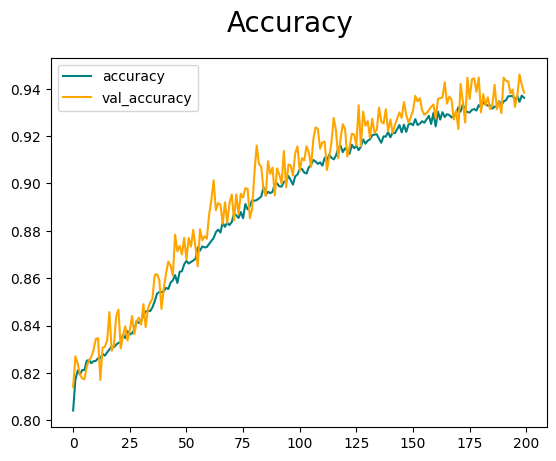

In [18]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [19]:
test_accuracy = model.evaluate(test_dataset,verbose=0,return_dict=True)['accuracy']
test_accuracy

0.9430000185966492

# Feature reduction
Try different combinations of features.
1. Removing collinear  features may help to boost the performance
2. Some setups may have business meaning except for the model training purpose.

In [20]:
#Removing collinear features may make us lose some information under these columns.
#Know whether default or not 6 months ahead.
#Remove features that contain less data

X_reduced_2 = df[['LIMIT_BAL', 'AGE', 'PAY_6','BILL_AMT6','PAY_AMT6',
       'SEX_1', 'SEX_2', 'EDUCATION_0', 'EDUCATION_1', 'EDUCATION_2',
       'EDUCATION_3','MARRIAGE_1', 'MARRIAGE_2']].values
y = np.squeeze(df[['default.payment.next.month']].values)

# Normalize the input features using Z-score normalization
scaler = StandardScaler()
X_reduced_normalized = scaler.fit_transform(X_reduced_2)

In [29]:
# Create a TensorFlow Dataset from the normalized input features and target labels
dataset_r = tf.data.Dataset.from_tensor_slices((X_reduced_normalized, y))

# Shuffle the dataset
dataset_r = dataset_r.shuffle(buffer_size=len(X_reduced_normalized))

# Split the data into train, validation, and test sets
train_size = int(0.8 * len(X_reduced_normalized))
val_size = int(0.1 * len(X_reduced_normalized))
test_size = int(0.1 * len(X_reduced_normalized))

# Split the dataset into train, validation, and test sets
train_dataset_r = dataset_r.take(train_size)
val_dataset_r = dataset_r.skip(train_size).take(val_size)
test_dataset_r = dataset_r.skip(train_size + val_size).take(test_size)

# Batch the datasets
batch_size = 8
train_dataset_r = train_dataset_r.batch(batch_size)
val_dataset_r = val_dataset_r.batch(batch_size)
test_dataset_r = test_dataset_r.batch(batch_size)

it = train_dataset_r.as_numpy_iterator()
print(it.next()[0].shape, it.next()[1].shape) #return a batch (X,y)
print(it.next()[0], it.next()[1]) #return a batch (X,y)
# for features, labels in train_dataset:
#   print("Train Features shape:", features.shape)
#   print("Train Labels shape:", labels.shape)

(8, 13) (8,)
[[ 0.72555396 -0.37812914 -1.48604076  0.14152921 -1.50801349 -0.81016074
   0.81016074 -0.02160751 -0.73837457 -0.93729517  2.25860162  1.09377971
  -1.06647132]
 [-1.43876488  1.68311131  1.99231551  0.56016935 -1.50801349 -0.81016074
   0.81016074 -0.02160751 -0.73837457  1.06689977 -0.44275183 -0.91426088
   0.93767172]
 [-0.05819264  2.00857033  1.99231551  0.96842693  0.63879843 -0.81016074
   0.81016074 -0.02160751 -0.73837457  1.06689977 -0.44275183  1.09377971
  -1.06647132]
 [ 0.46509549 -1.02904717  0.25313738  0.75315505  0.28571505 -0.81016074
   0.81016074 -0.02160751  1.35432616 -0.93729517 -0.44275183 -0.91426088
   0.93767172]
 [ 0.57704785 -0.37812914 -0.61645169 -0.67687064  0.92730423 -0.81016074
   0.81016074 -0.02160751 -0.73837457  1.06689977 -0.44275183 -0.91426088
   0.93767172]
 [-1.43876488 -0.05267012  1.99231551  0.2964821   0.23536146  1.23432296
  -1.23432296 -0.02160751 -0.73837457  1.06689977 -0.44275183 -0.91426088
   0.93767172]
 [ 0.1980

In [30]:
tf.keras.backend.clear_session()

In [35]:
model_2 = Sequential()

In [36]:
it = train_dataset_r.as_numpy_iterator()
print(it.next()[0].shape, it.next()[1].shape) #return a batch (X,y)
input_shape = it.next()[0].shape
input_shape[1]

(8, 13) (8,)


13

In [37]:
# a binary classification, taking signoid as the output activation function
# Don't need an input layer since it's sequential

model_2.add(Dense(256, input_shape=(input_shape[1],), activation='relu'))
model_2.add(Dense(64, activation='relu'))
model_2.add(Dense(16, activation='relu'))
model_2.add(Dense(32, activation='relu'))
model_2.add(Dense(64, activation='relu'))
model_2.add(Dense(1, activation='sigmoid'))

#optimizer = Adam(learning_rate=0.00001)
model_2.compile(optimizer= tf.keras.optimizers.Adam(0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [38]:
hist = model_2.fit(train_dataset_r, epochs=200, validation_data=val_dataset_r)

Epoch 1/200
3000/3000 [==============================] - 19s 6ms/step - loss: 0.5045 - accuracy: 0.7809 - val_loss: 0.4920 - val_accuracy: 0.7860
Epoch 2/200
3000/3000 [==============================] - 16s 5ms/step - loss: 0.4898 - accuracy: 0.7862 - val_loss: 0.4831 - val_accuracy: 0.7903
Epoch 3/200
3000/3000 [==============================] - 17s 6ms/step - loss: 0.4829 - accuracy: 0.7921 - val_loss: 0.4823 - val_accuracy: 0.7880
Epoch 4/200
3000/3000 [==============================] - 17s 6ms/step - loss: 0.4871 - accuracy: 0.7882 - val_loss: 0.4753 - val_accuracy: 0.7940
Epoch 5/200
3000/3000 [==============================] - 18s 6ms/step - loss: 0.4862 - accuracy: 0.7884 - val_loss: 0.4890 - val_accuracy: 0.7883
Epoch 6/200
3000/3000 [==============================] - 16s 5ms/step - loss: 0.4835 - accuracy: 0.7900 - val_loss: 0.4687 - val_accuracy: 0.7983
Epoch 7/200
3000/3000 [==============================] - 19s 6ms/step - loss: 0.4782 - accuracy: 0.7927 - val_loss: 0.4946 -

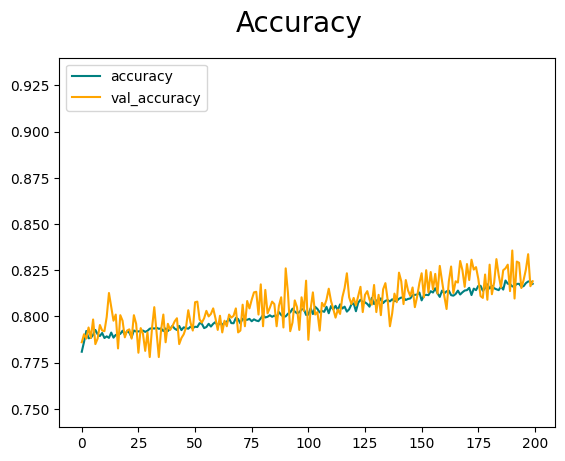

In [42]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.ylim(0.74, 0.94)
plt.show()
##didn't increase the accuracy

In [43]:
test_accuracy = model.evaluate(test_dataset_r,verbose=0,return_dict=True)['accuracy']
test_accuracy

0.8186666369438171

Now, our first model can predict whether a specific credit card owner will default or not based on his/her long-term repayment status (6 months) and the predicting accuracy is 94%. Also, we have another model that can make predictions six months ahead and the accuracy is 81%. For a real-world scenario, we can send out a warning message six months ahead and a forecast a month ahead that can help the bank to get prepared.

In [ ]:
#How about 5 months or 4 months ahead?
#any other way to boost accuracy?
#Provide more data
  #Cross Validation
  #combine training and valuating data set.



# Evaluation
### Accuray / recall
### https://www.kaggle.com/code/jcontr/meta-learning-credit-card-default
